In [624]:
dato='16.10.2018'
tidStart='16:00:00'
tidSlutt='17:30:00'

In [625]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_csv("Polytron 7000_ARYE0794_17_7_2017.csv", sep=';', header=None)


In [639]:
df.head()

,H2O2
Tid,
16:00:35,9.591
16:01:35,9.386
16:02:35,9.261
16:03:35,9.116
16:04:35,8.926


In [627]:
df=df[df[0]=='VAL'] #fjerner alle rader uten VAL i seg (alle uten en H2O2-verdi)

In [629]:
df=df.loc[:,1:3] # fjerner alle kolonner utenom dato, tid og H2O2

In [630]:
df.columns = ['Dato', 'Tid', 'H2O2'] # Gir kolonnene passende navn

In [632]:
df=df[df['Dato']==dato] #fjerner målinger gjort på andre datoer enn det vi ønsker basert på forhåndsbestemt dato 

In [633]:
df=df.drop(['Dato'], axis=1) #fjerner dato-kolonnen

In [634]:
df=df[(df['Tid'] > tidStart) & (df['Tid'] < tidSlutt)] #fjerner målinger gjort på andre tidspunkt 
#enn det vi ønsker basert på forhåndsbestemt start og slutt tid 

In [635]:
df['H2O2'] = df['H2O2'].str.replace(',','.').astype(np.float64) #setter kolonnen H2O2 til float i stedet for object og bytter 
#skilletegn fra , til .

In [636]:
df=df.set_index('Tid') # Setter Tid som en index for radene

In [637]:
df.head()

,H2O2
Tid,
16:00:35,9.591
16:01:35,9.386
16:02:35,9.261
16:03:35,9.116
16:04:35,8.926


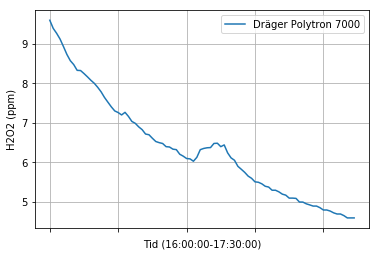

In [644]:
df.plot()
plt.xlabel('Tid (' + tidStart + '-' + tidSlutt + ')')
plt.ylabel('H2O2 (ppm)')
plt.legend(['Dräger Polytron 7000'])
plt.savefig('H2O2plot ' + dato + '.png')
plt.grid()
plt.show()
